# EE559 HW3 HW4 

# Name: Yuxiang Hou                                  USCID:1126739072

# 
An interesting task in machine learning is classification of time series. In this problem, we will classify the activities of humans based on time series obtained by a Wireless Sensor Network.

# 
(a) Download the AReM data from: https://archive.ics.uci.edu/ml/datasets/ Activity+Recognition+system+based+on+Multisensor+data+fusion+\%28AReM\ %29 . The dataset contains 7 folders that represent seven types of activities. In each folder, there are multiple files each of which represents an instant of a human performing an activity. Each file containis 6 time series collected from activities
of the same person. There are 88 instances in the dataset, each of which contains 6 time series and each time series has 480 consecutive values.

(b) Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data.

In [1]:
#in this step we will merge different datasets to train datasets and test datasets
import pandas as pd
import numpy as np 

In [2]:
import os
path = "/Users/yuxianghou/Desktop/AReM"
files= os.listdir(path) #得到文件夹下的所有文件名称

train_list=[]
test_list=[]
all_list=[]

for file in files:
    if file.startswith("ben"):
        bending_path=path+"/"+str(file)
        bending_files=os.listdir(bending_path)
        
        for bending_file in bending_files:
            current_path=bending_path+"/"+str(bending_file)
            all_list.append(current_path)
            
            if bending_file.endswith("1.csv") or bending_file.endswith("2.csv"):
                #then we will save the data
                test_list.append(current_path)
            else:
                train_list.append(current_path)
    
    if file.endswith("ing"):
        data_path=path+"/"+str(file)
        data_files=os.listdir(data_path)
        for data_file in data_files:
            current_path=data_path+"/"+str(bending_file)
            all_list.append(current_path)
            
            if data_file=="dataset1.csv" or data_file=="dataset2.csv" or data_file=="dataset3.csv":
                test_list.append(current_path)
            else:
                train_list.append(current_path)

            
            
                
                
                
                
                
        
        
        
        
        
    

In [3]:
def get_data_list(alist):
    data_list=[]
    for path in alist:
        data=pd.read_csv(path,header=4)
        data_list.append(data)
    return data_list
        

In [4]:
train_data_list=get_data_list(train_list)
test_data_list=get_data_list(test_list)

In [5]:
train_data=pd.concat(train_data_list)
test_data=pd.concat(test_data_list)

In [6]:
train_data.head()

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,0,42.00,0.71,21.25,0.43,30.00,0.00
1,250,41.50,0.50,20.25,1.48,31.25,1.09
2,500,41.50,0.50,14.25,1.92,33.00,0.00
3,750,40.75,0.83,15.75,0.43,33.00,0.00
4,1000,40.00,0.71,20.00,2.74,32.75,0.43


In [7]:
test_data.head()

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,0,39.25,0.43,22.75,0.43,33.75,1.3
1,250,39.25,0.43,23.00,0.00,33.00,0.0
2,500,39.25,0.43,23.25,0.43,33.00,0.0
3,750,39.50,0.50,23.00,0.71,33.00,0.0
4,1000,39.50,0.50,24.00,0.00,33.00,0.0


# (c) Feature Extraction
Classification of time series usually needs extracting features from them. In this problem, we focus on time-domain features.
i. Research what types of time-domain features are usually used in time series classification and list them (examples are minimum, maximum, mean, etc).

My Answer:Mean,max,min, variance, first quartile and third quartile are always useful for the analysis of time series

#Extract the time-domain features minimum, maximum, mean, median, stan- dard deviation, first quartile, and third quartile for all of the 6 time series in each instance. You are free to normalize/standardize features or use them directly.2

In [8]:
all_data_list=get_data_list(all_list) #then we have all data_list result

In [9]:
#this is the statistical result

def get_Statistical_result(alist):
    min_=np.min(alist)
    max_=np.max(alist)
    mean_=np.mean(alist)
    median_=np.median(alist)
    std_=np.std(alist)
    
    first_quartile=np.percentile(alist,25)
    third_quartile=np.percentile(alist,75)
    
    return [min_,max_,mean_,median_,std_,first_quartile,third_quartile]
    
    
    

In [10]:
def get_DataMatrix(dataframe_list):
    
    all_result=[]
    for dataframe in dataframe_list:
        
        #then the input is the dataframe right now, get the statistical result
        avg_rss12_statis=get_Statistical_result(dataframe["avg_rss12"])
        var_rss12_statis=get_Statistical_result(dataframe["var_rss12"])
        avg_rss13_statis=get_Statistical_result(dataframe["avg_rss13"])
        var_rss13_statis=get_Statistical_result(dataframe["var_rss13"])
        avg_rss23_statis=get_Statistical_result(dataframe["avg_rss23"])
        var_rss23_statis=get_Statistical_result(dataframe["var_rss23"])
        
        
        one_result=avg_rss12_statis+var_rss12_statis+avg_rss13_statis+var_rss13_statis+avg_rss23_statis+var_rss23_statis
        all_result.append(one_result)
    return all_result
            
        
        

    
        

In [11]:
matrix=get_DataMatrix(all_data_list)
train_matrix=get_DataMatrix(train_data_list)
test_matrix=get_DataMatrix(test_data_list)
columns=["min1","max1","mean1","median1","std1","1st quartile1","3rd quartile1",
         "min2","max2","mean2","median2","std2","1st quartile2","3rd quartile2",
         "min3","max3","mean3","median3","std3","1st quartile3","3rd quartile3",
         "min4","max4","mean4","median4","std4","1st quartile4","3rd quartile4",
         "min5","max5","mean5","median5","std5","1st quartile5","3rd quartile5",
         "min6","max6","mean6","median6","std6","1st quartile6","3rd quartile6"]
        
Data=pd.DataFrame(matrix,columns=columns)
train_data=pd.DataFrame(train_matrix,columns=columns)
test_data=pd.DataFrame(test_matrix,columns=columns)


In [12]:
train_data.shape

(69, 42)

In [13]:
test_data.shape

(19, 42)

# iii. Use your judgement to select the three most important time-domain features (one option may be min, mean, and max).

According to the above dataframe,I think min,std, and median are the three most important features., because we can know almost surely the situation of one column distribution if we know std, mean, median and std 


# (d) Binary Classification Using Logistic Regression3

i. Assume that you want to use the training set to classify bending from other
activities, i.e. you have a binary classification problem. Depict scatter plots
of the features you specified in 1(c)iii extracted from time series 1, 2, and 6 of each instance, and use color to distinguish bending vs. other activities. (See p. 129 of the textbook).4


In [14]:
#according to the above result, then we will pick the series 1 min ,std1,median1 features
new_data=Data[["min1","median1","std1","min2","median2","std2","min6","median6","std6"]]

In [15]:
label=["bending"]*13+["others"]*75
new_data["Label"]=label

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
import matplotlib.pylab as plt
%matplotlib inline

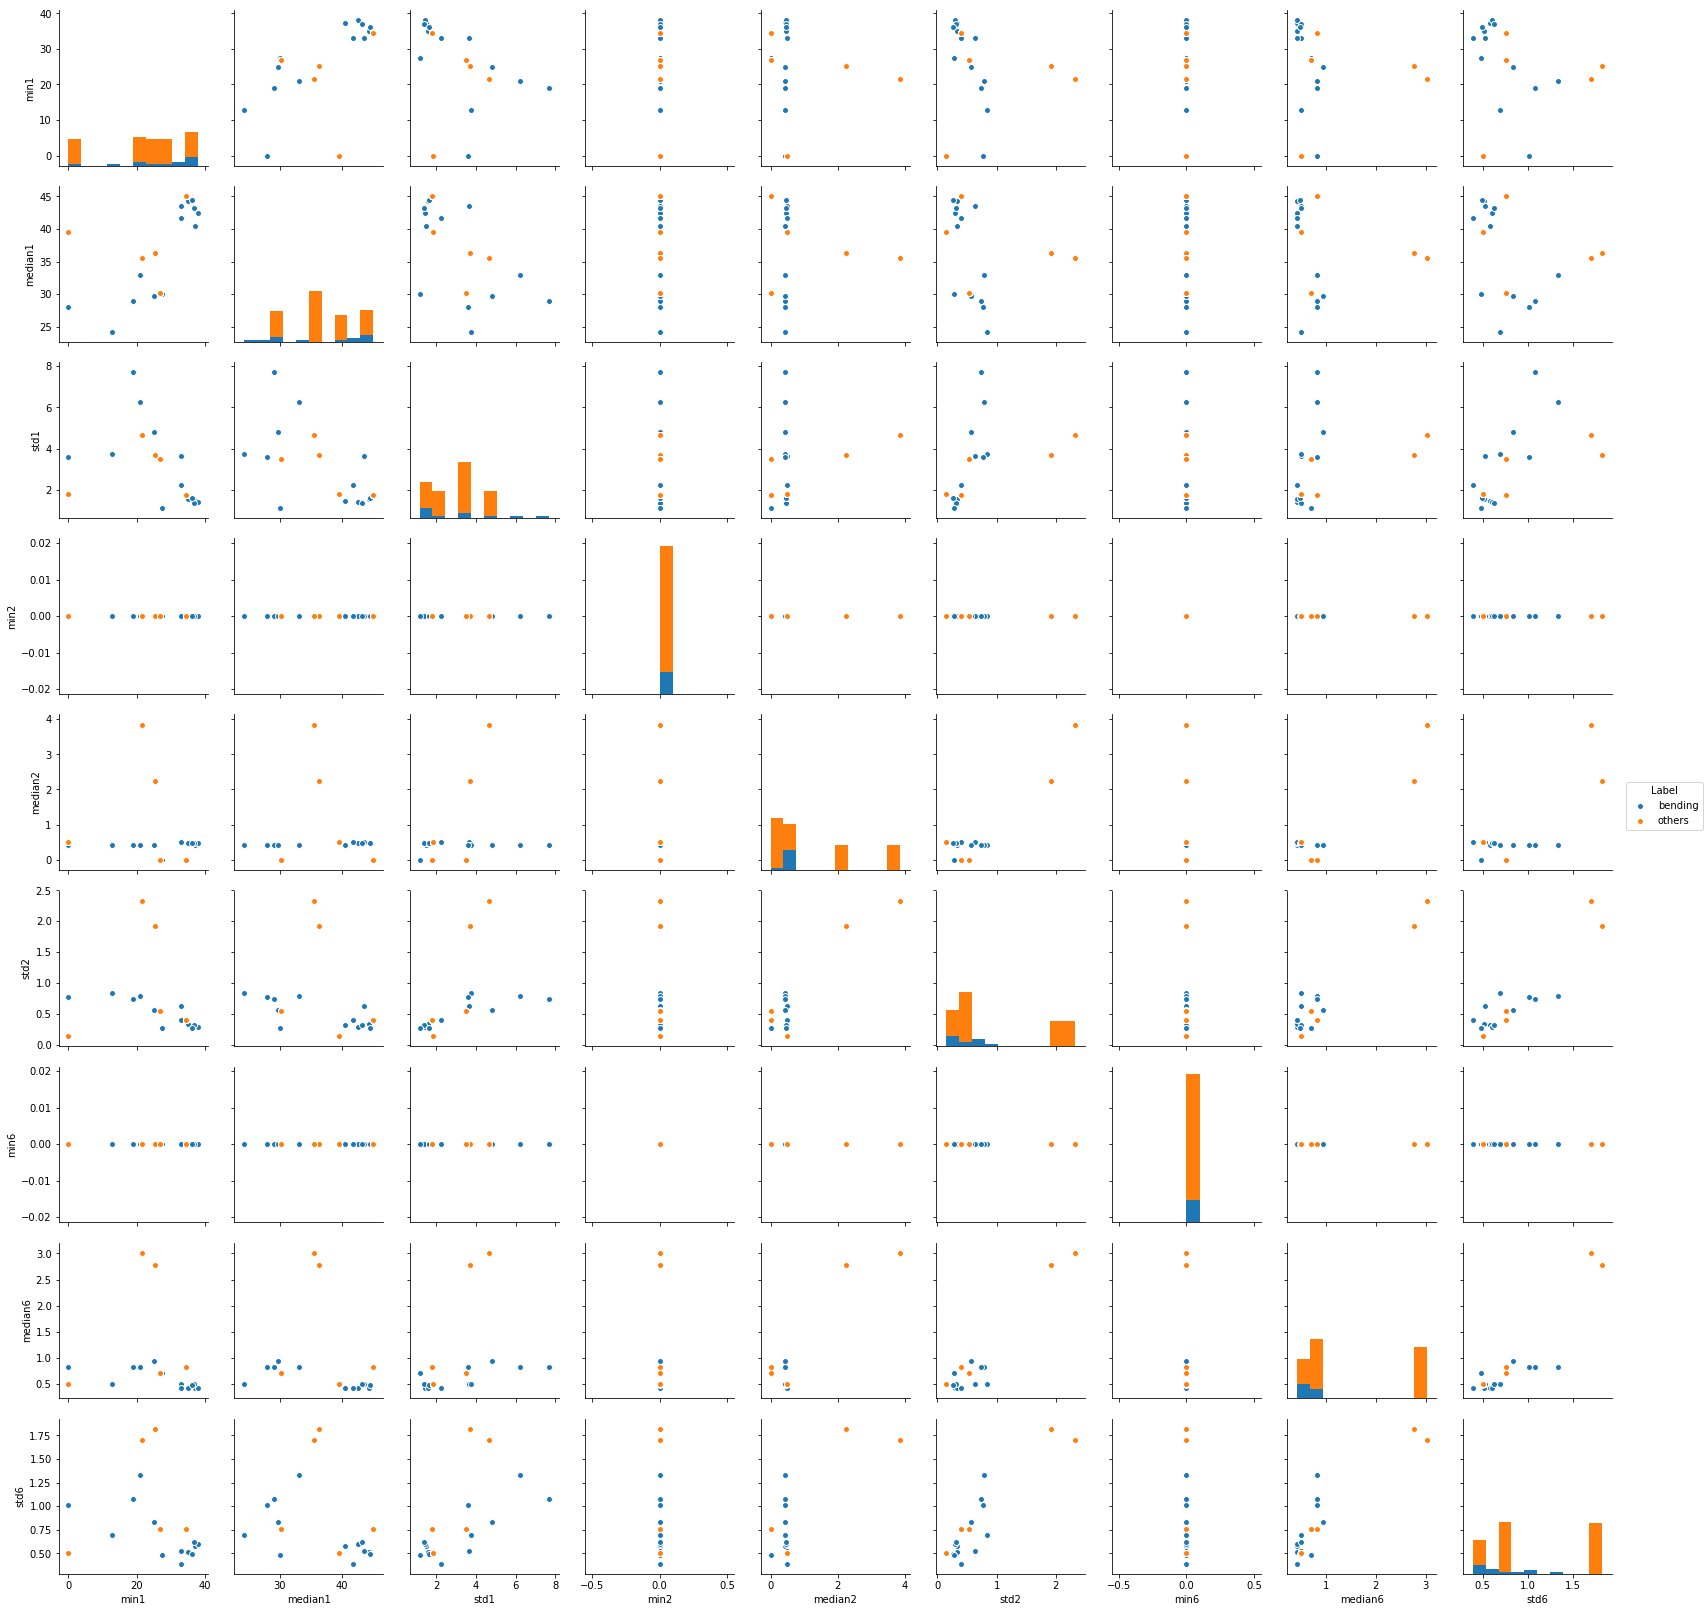

In [17]:
import seaborn as sns
sns.pairplot(new_data,hue="Label")

# ii. Break each time series in your training set into two (approximately) equal length time series. Now instead of 6 time series for each of the 88 instances, you have 12 time series for each instance. Repeat the experiment in 1(d)i. Do you see any considerable difference in the results with those of 1(d)i?


In [18]:
def seperate_data():
    new_all_list=[]
    
    for dataframe in all_data_list:
        
        first=dataframe[:240]
        second=dataframe[240:]
        new_all_list.append(first)
        new_all_list.append(second)
    return new_all_list

double_dataframe_list=seperate_data()
new_matrix=get_DataMatrix(double_dataframe_list)
double_df=pd.DataFrame(new_matrix,columns=columns)
new_double_df=double_df[["min1","median1","std1","min2","median2","std2","min6","median6","std6"]]

label=["bending"]*26+["others"]*150
new_double_df["Label"]=label



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


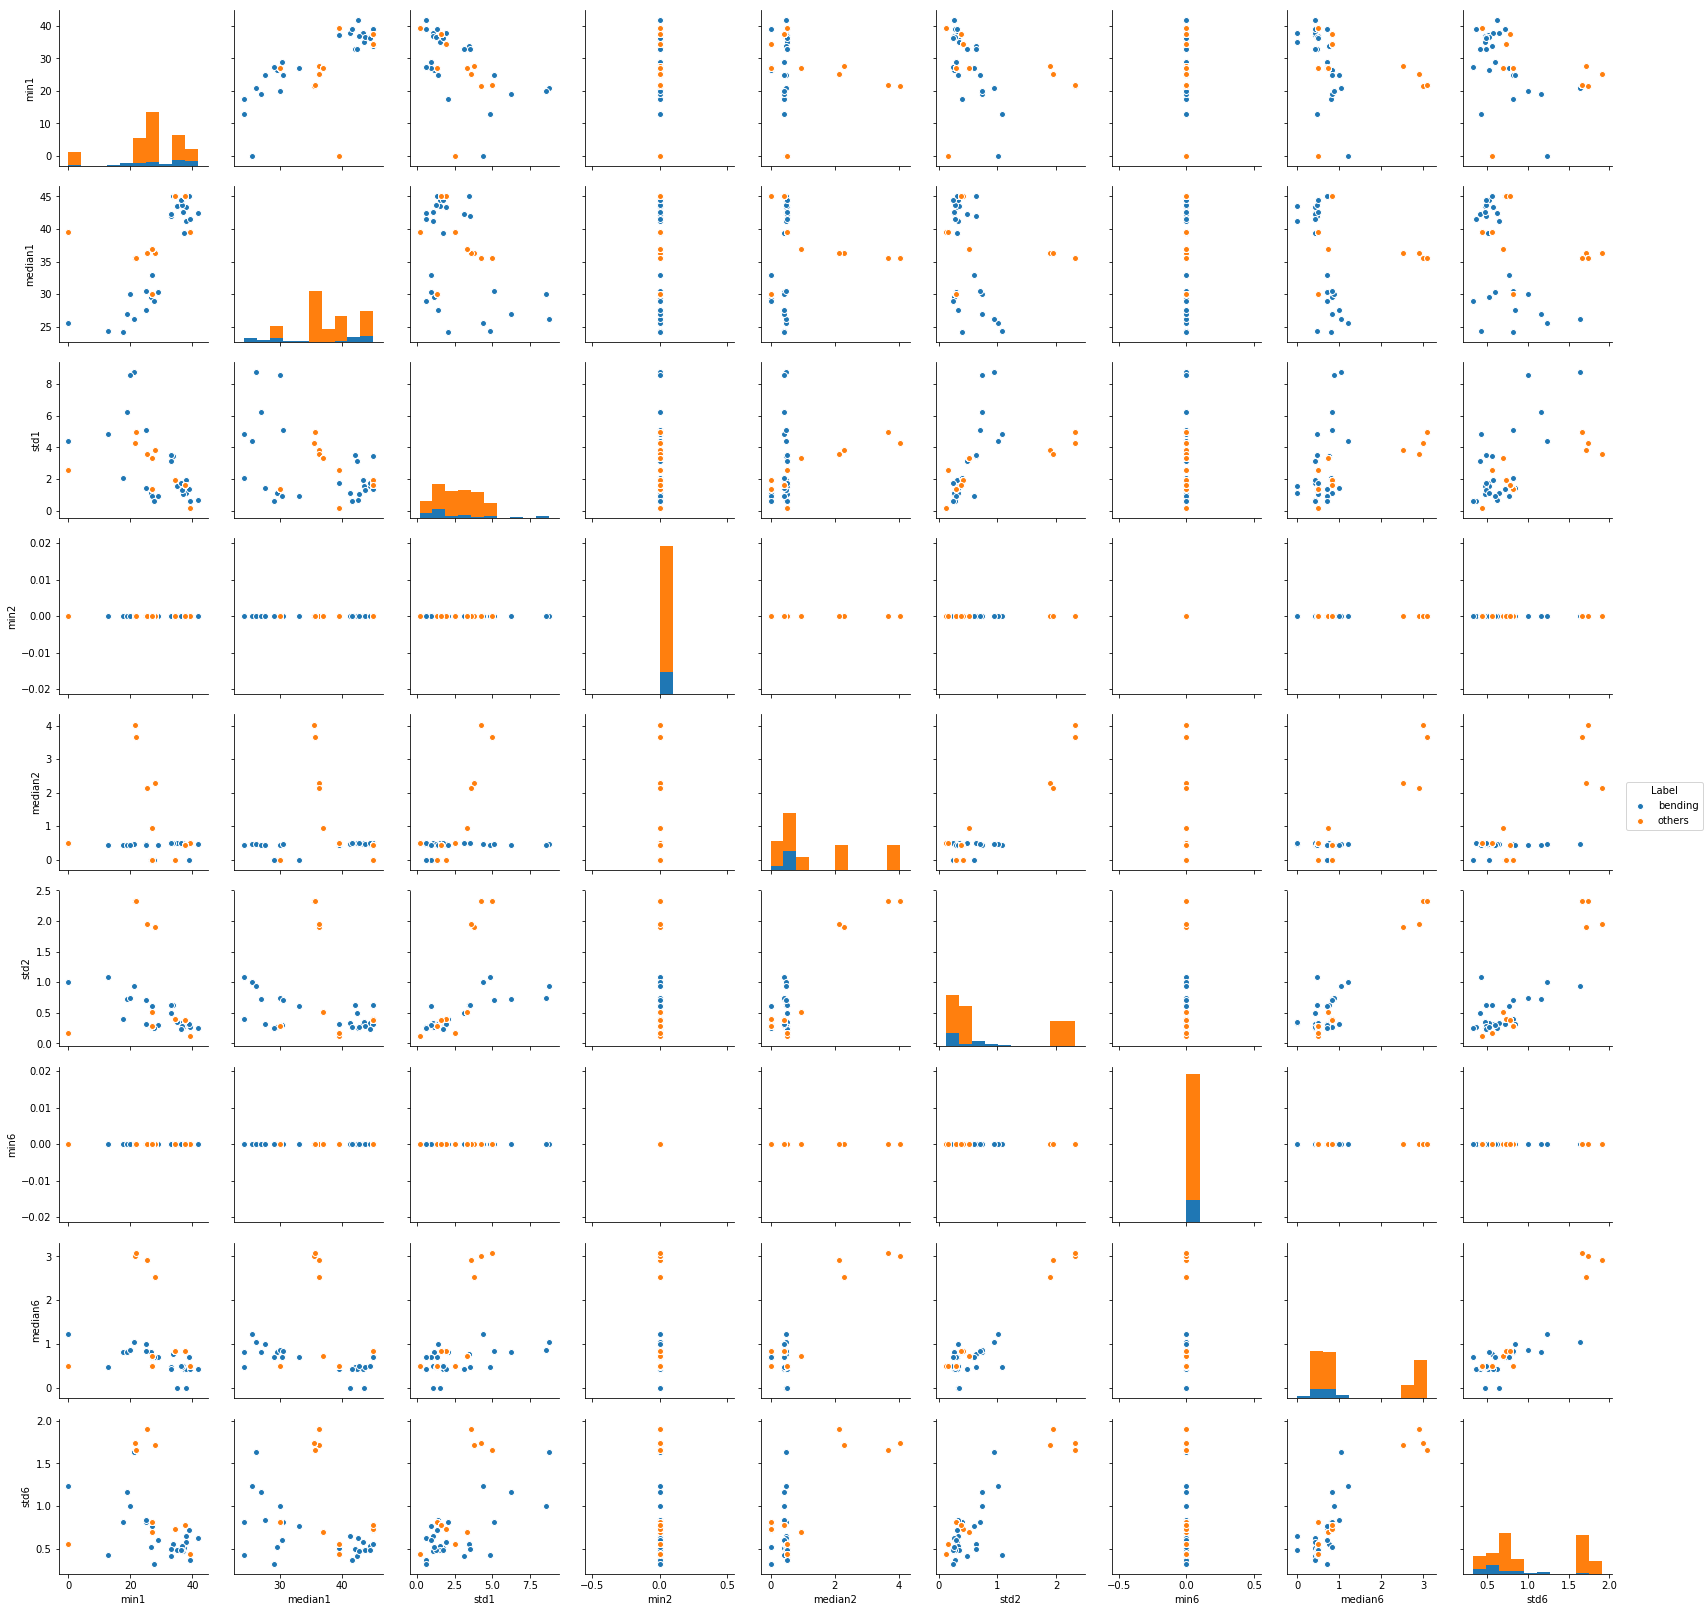

In [19]:
sns.pairplot(new_double_df,hue="Label")

we can find here there are more data points in each subplot, and some pattern seems become more clearn compared to the patten in (d)(i)

# iii

#Break each time series in your training set into l ∈ {1, 2, . . . , 20} time series of approximately equal length and use logistic regression5 to solve the binary classification problem, using time-domain features. Calculate the p-values for your logistic regression parameters and refit a logistic regression model using your pruned set of features.6 Alternatively, you can use backward selection using sklearn.feature selection or glm in R. Use 5-fold cross-validation to de- termine the best value of l. Explain what the right way and the wrong way are to perform cross-validation in this problem.7 Obviously, use the right way! Also, you may encounter the problem of class imbalance, which may make some of your folds not having any instances of the rare class. In such a case, you can use stratified cross validation. Research what it means and use it if needed.
In the following, you can see an example of applying Python’s Recursive Feature Elimination, which is a backward selection algorithm, to logistic re- gression.

In [20]:
#break time series into k folder
#the input is a list, then we will split the split into k part
def get_list_split(alist,k):
    split_len=len(alist)//k   #k=10, then every k has 48
    
    new_list=[]
    for i in range(k):
        split_small_list=alist[(split_len*i):(split_len*(i+1))]
        if i==k-1:
            split_small_list=alist[(split_len*(k-1)):]
        new_list.append(split_small_list)
    return new_list
        
        
        
        

        

In [21]:
def get_train_datasets_labels():
    new_list=[]
    for i in range(len(train_data_list)):
        if i<9:
            train_data_list[i]["Labels"]=["Bedding"]*480
        else:
            train_data_list[i]["Labels"]=["Others"]*480
        new_list.append(train_data_list[i])
    return new_list

new_train_data_list=get_train_datasets_labels()


In [22]:
print(new_train_data_list[0])

     # Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0                  0      42.00       0.71      21.25       0.43      30.00   
1                250      41.50       0.50      20.25       1.48      31.25   
2                500      41.50       0.50      14.25       1.92      33.00   
3                750      40.75       0.83      15.75       0.43      33.00   
4               1000      40.00       0.71      20.00       2.74      32.75   
5               1250      41.25       0.83      24.25       0.43      31.50   
6               1500      42.25       0.43      23.75       0.43      35.25   
7               1750      43.50       0.87      21.00       0.00      36.00   
8               2000      42.75       0.83      21.25       0.43      36.00   
9               2250      43.25       0.43      23.75       0.43      36.00   
10              2500      43.25       0.83      24.50       0.50      36.00   
11              2750      43.75       0.43      24.2

In [23]:
def get_K_Times_Train_Datasets(k):
    all_list=[]
    for train_data in new_train_data_list:
        alist=[x for x in range(480)]
        list_split=get_list_split(alist,k)
        
        for i in range(len(list_split)):
            new_train_data=train_data.loc[list_split[i],:]
            all_list.append(new_train_data)
    return all_list
#then we have to consider original datasets bedding situation

In [26]:
#data preparation,from the above graph, we can find that K=2 is the best model
two_times_list=get_K_Times_Train_Datasets(2)
matrix=get_DataMatrix(two_times_list)
df=pd.DataFrame(matrix,columns=columns)
df["Labels"]=[0]*(9*2)+[1]*(len(two_times_list)-(9*2))
X_train=df.drop("Labels",axis=1)
Y_train=df["Labels"]
min_max_scaler = preprocessing.MinMaxScaler()
X_train_normalized=min_max_scaler.fit_transform(X_train)


In [27]:
df.head()

,min1,max1,mean1,median1,std1,1st quartile1,3rd quartile1,min2,max2,mean2,...,1st quartile5,3rd quartile5,min6,max6,mean6,median6,std6,1st quartile6,3rd quartile6,Labels
0,36.50,46.50,44.057167,44.50,1.553724,43.2500,45.00,0.0,1.50,0.381042,...,36.00,37.00,0.0,1.79,0.598250,0.500,0.525558,0.0,1.00,0
1,35.00,47.40,43.851833,43.50,1.553920,43.0000,45.00,0.0,1.70,0.471458,...,33.00,36.25,0.0,1.50,0.388333,0.000,0.477530,0.0,0.71,0
2,33.75,47.75,43.278875,45.00,3.466111,42.0000,45.25,0.0,3.00,0.673292,...,36.00,37.00,0.0,1.53,0.640958,0.765,0.553385,0.0,1.22,0
3,33.00,46.00,41.080750,42.00,3.530103,37.7500,44.50,0.0,2.86,0.718792,...,28.75,33.75,0.0,2.18,0.586083,0.470,0.490847,0.0,0.87,0
4,33.00,45.75,41.621208,42.33,3.112140,39.6525,44.25,0.0,2.83,0.623083,...,28.50,31.50,0.0,1.79,0.419083,0.430,0.410342,0.0,0.71,0


In [28]:
def important_feature(alist):
    feature_list=[]
    for i in range(len(alist)):
        if alist[i]==True:
            feature_list.append(columns[i])
    return feature_list
            

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
def grid_search_cv():
    res=0
    best_k_number=0
    best_k_feature_number=0
    current_list=[]
    
    for i in range(1,21):
        k_times_list=get_K_Times_Train_Datasets(i)
        matrix=get_DataMatrix(k_times_list)
        df=pd.DataFrame(matrix,columns=columns)
        df["Labels"]=[0]*(9*i)+[1]*(len(k_times_list)-(9*i))
        X_train=df.drop("Labels",axis=1)
        min_max_scaler = preprocessing.MinMaxScaler()
        X_train_normalized=min_max_scaler.fit_transform(X_train)
        Y_train=df["Labels"]
        
        cv_score=0
        current_best_k=0
        current_best_feature_number=0
        
        for j in range(1,43):
            model=LogisticRegression()
            rfe=RFE(model,j)

            rfe.fit(X_train_normalized,Y_train)
            ranking_list=rfe.support_

            feature_list=important_feature(ranking_list)

            new_X_train=df[feature_list]
            Y_train=df["Labels"]

            min_max_scaler = preprocessing.MinMaxScaler()
            new_X_train_normalized=min_max_scaler.fit_transform(new_X_train)

            Log=linear_model.LogisticRegression()
            scores = cross_val_score(Log,new_X_train_normalized ,Y_train, cv=5)
            avg_scores=np.mean(scores)
            #print("When Time Series ="+str(i)+",Feature number equals ="+str(j)+" CV scores is"+str(avg_scores))
            
            if avg_scores>res:
                res=avg_scores
                best_k_number=i
                best_k_feature_number=j
            if avg_scores>cv_score:
                cv_score=avg_scores
                current_best_k=i
                current_best_feature_number=j
        current_list.append((current_best_k,current_best_feature_number))
            
                
                
    return current_list
alist=grid_search_cv()

From the Above result, we can find that when Time Series number=6, and the feature number equals to 9, The cross validation result is the highest with 95.40% accuracy

In [30]:
#save it to the csv file

six_times_list=get_K_Times_Train_Datasets(6)
matrix=get_DataMatrix(six_times_list)
df=pd.DataFrame(matrix,columns=columns)
df["Labels"]=[0]*(9*6)+[1]*(len(six_times_list)-(9*6))

X_train=df.drop("Labels",axis=1)
min_max_scaler = preprocessing.MinMaxScaler()
X_train_normalized=min_max_scaler.fit_transform(X_train)
Y_train=df["Labels"]

model=LogisticRegression()
rfe=RFE(model,9)
rfe.fit(X_train_normalized,Y_train)
ranking_list=rfe.support_
feature_list=important_feature(ranking_list)
best_model=df[feature_list]
best_model["Labels"]=Y_train
best_model.to_csv("Best_Model.csv")


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [31]:
best_model.shape

(414, 10)

In [32]:
best_model.head()

,min2,1st quartile2,1st quartile3,median4,1st quartile4,min5,max5,mean5,3rd quartile5,Labels
0,0.0,0.0,22.1875,0.215,0.0,30.0,37.50,35.906250,36.5000,0
1,0.0,0.0,22.5000,0.470,0.0,33.0,38.50,36.791500,37.5000,0
2,0.0,0.0,20.2500,0.485,0.0,32.5,38.33,36.182875,37.6900,0
3,0.0,0.0,20.1875,0.470,0.0,29.0,37.00,33.245625,35.7525,0
4,0.0,0.0,20.1875,0.430,0.0,30.0,38.25,35.385875,37.0000,0


In [33]:
#make the plot of ROC and AUC curve
from sklearn import metrics
X_train=best_model.drop("Labels",axis=1)
X_train=np.array(X_train)
Y_train=list(best_model["Labels"])

model=LogisticRegression()
model.fit(X_train,Y_train)
probs=model.predict_proba(X_train)

In [34]:
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_train, preds)
roc_auc = metrics.auc(fpr, tpr)

In [35]:
print(roc_auc) #So the AUC curve result is 98.3%

0.9839506172839506


In [36]:
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))


Text(0,0.5,'TPR')

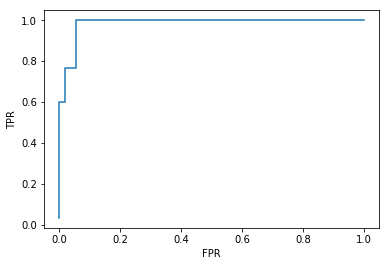

In [37]:
plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")

# from here we can find the best model is 6 times series and the Number of features equals to 9,we will save it

#P_value calcualtion
#Method-calcuate P value by using the code 
fit<- glm(Labels~. ,data=Best_Model,family = binomial())
#summary(fit) in R



# Explain what the right way and the wrong way are to perform cross-validation in this problem

Correct Way:According to the above experiment,we can find that the correct procedure to choose the cross validation result is set different parameters, and then use cross-validation to guide us to pick the correct parameters.

In [38]:
from sklearn.metrics import confusion_matrix

# Report the confusion matrix and show the ROC and AUC for your classifier on train data. Report the parameters of your logistic regression βi’s as well as the p-values associated with them.

In [39]:
data=pd.read_csv("Best_Model.csv")

In [40]:
data.head()

,Unnamed: 0,min2,1st quartile2,1st quartile3,median4,1st quartile4,min5,max5,mean5,3rd quartile5,Labels
0,0,0.0,0.0,22.1875,0.215,0.0,30.0,37.50,35.906250,36.5000,0
1,1,0.0,0.0,22.5000,0.470,0.0,33.0,38.50,36.791500,37.5000,0
2,2,0.0,0.0,20.2500,0.485,0.0,32.5,38.33,36.182875,37.6900,0
3,3,0.0,0.0,20.1875,0.470,0.0,29.0,37.00,33.245625,35.7525,0
4,4,0.0,0.0,20.1875,0.430,0.0,30.0,38.25,35.385875,37.0000,0


In [41]:
train_x=data.drop("Labels",axis=1)
train_y=data["Labels"]

min_max_scaler = preprocessing.MinMaxScaler()
train_x_norm=min_max_scaler.fit_transform(train_x)

model=LogisticRegression()
model.fit(train_x_norm,train_y)
predict=model.predict(train_x_norm)

print(confusion_matrix(predict,train_y))



[[ 49   0]
 [  5 360]]


# Test the classifier on the test set. Remember to break the time series in your test set into the same number of time series into which you broke your training set. Remember that the classifier has to be tested using the features extracted from the test set. Compare the accuracy on the test set with the cross-validation accuracy you obtained previously.

In [42]:
#then we can know the test datasets also need to have time series=6, and K=9. 
train_data=pd.read_csv("Best_Model.csv")


In [43]:
def get_test_datasets_labels():
    new_list=[]
    for i in range(len(test_data_list)):
        if i<4:
            test_data_list[i]["Labels"]=["Bedding"]*480
        else:
            test_data_list[i]["Labels"]=["Others"]*480
        new_list.append(train_data_list[i])
    return new_list
new_test_data_list=get_test_datasets_labels()

In [44]:
def get_K_Times_Test_Datasets(k):
    all_list=[]
    for test_data in new_test_data_list:
        alist=[x for x in range(480)]
        list_split=get_list_split(alist,k)
        
        for i in range(len(list_split)):
            new_test_data=test_data.loc[list_split[i],:]
            all_list.append(new_test_data)
    return all_list

In [45]:
#then we will get the whole test datasets
six_times_test_list=get_K_Times_Train_Datasets(6)
matrix=get_DataMatrix(six_times_test_list)
df=pd.DataFrame(matrix,columns=columns)
df["Labels"]=[0]*(9*6)+[1]*(len(six_times_test_list)-(9*6))

In [46]:
train_data=train_data.drop("Unnamed: 0",axis=1)

In [47]:
clean_feature=list(train_data.columns)

In [48]:
test_data=df[clean_feature]

In [49]:
print(train_data.shape)
print(test_data.shape)

(414, 10)
(414, 10)


In [50]:
from sklearn.metrics import confusion_matrix
train_x=train_data.drop("Labels",axis=1)
train_y=train_data["Labels"]

test_x=test_data.drop("Labels",axis=1)
test_y=test_data["Labels"]

min_max_scaler = preprocessing.MinMaxScaler()
train_x_normalized=min_max_scaler.fit_transform(train_x)
test_x_normalized=min_max_scaler.fit_transform(test_x)


Log=LogisticRegression()
Log.fit(train_x_normalized,train_y)
predict=Log.predict(test_x)
matrix=confusion_matrix(predict,test_y)
accuracy=(matrix[0][0]+matrix[1][1])/(matrix[0][0]+matrix[0][1]+matrix[1][0]+matrix[1][1])
print(matrix)
print("The test datasets accuracy score is: "+str(accuracy))

[[ 54 360]
 [  0   0]]
The test datasets accuracy score is: 0.13043478260869565


From above we can find that the test dataset accuracy is only 13.0%, which are much lower than the cross validation score in test datasets

# Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?

# From the confusion matrices you obtained, do you see imbalanced classes? If yes, build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model.

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE

In [52]:
train_features=train_data.drop("Labels",axis=1)
train_target=train_data["Labels"]

test_features=test_data.drop("Labels",axis=1)
test_target=test_data["Labels"]

In [53]:
x_train, x_val, y_train, y_val = train_test_split(train_features, train_target,
                                                  test_size = .1,
                                                  random_state=12)

In [54]:
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [55]:
log=LogisticRegression()
log.fit(x_train_res,y_train_res)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
print(log.score(x_val,y_val))
print(recall_score(y_val, log.predict(x_val)))

0.9523809523809523
0.9375


In [57]:
matrix=confusion_matrix(log.predict(x_val),y_val)

In [58]:
print(matrix)
accuracy=(matrix[0][0]+matrix[1][1])/(matrix[0][0]+matrix[0][1]+matrix[1][0]+matrix[1][1])
print("The test datasets accuracy score is: "+str(accuracy))

[[10  2]
 [ 0 30]]
The test datasets accuracy score is: 0.9523809523809523


# (e) Binary Classification Using L1-penalized logistic regression

 i. Repeat 1(d)iii using L1-penalized logistic regression,8 i.e. instead of using p- values for variable selection, use L1 regularization. Note that in this problem, you have to cross-validate for both l, the number of time series into which you break each of your instances, and λ, the weight of L1 penalty in your logistic regression objective function (or C, the budget). Packages usually perform cross-validation for λ automatically.9

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
def logistic_grid_search_cv():
    res=0
    best_k_number=0
    best_lambda=0
    current_list=[]
    
    #i is the number of Time Seires, J is the number of Lambda we choose
    for i in range(1,21):
        k_times_list=get_K_Times_Train_Datasets(i)
        matrix=get_DataMatrix(k_times_list)
        df=pd.DataFrame(matrix,columns=columns)
        df["Labels"]=[0]*(9*i)+[1]*(len(k_times_list)-(9*i))
        
        X_train=df.drop("Labels",axis=1)
        min_max_scaler = preprocessing.MinMaxScaler()
        X_train_normalized=min_max_scaler.fit_transform(X_train)
        Y_train=df["Labels"]
        
        cv_score=0
        current_best_k=0
        current_best_feature_number=0
        
        
        for j in np.arange(1,100):
            model=LogisticRegression(penalty="l1",C=1/j)
            scores = cross_val_score(model,X_train_normalized ,Y_train, cv=5)
            avg_scores=np.mean(scores)
            #print("When Time Series ="+str(i)+", Lasso Regualize Lambda ="+str(j)+" CV scores is"+str(avg_scores))
            
            if avg_scores>res:
                res=avg_scores
                best_k_number=i
                best_lambda=j
                
    current_list.append((res,best_k_number,best_lambda))
            
                
                
    return current_list

Lasso_Res=logistic_grid_search_cv()
print(Lasso_Res)

[(0.9857142857142858, 1, 1)]


ii. Compare the L1-penalized with variable selection using p-values. Which one performs better? Which one is easier to implement?

From The above result, we can find that L1 Regualizer is much easier to implement because it did not have the process of feature selection, it can Automatically select the feature. Also The best Accuracy score is 98.7% which is higher than the RTF best Accuracy is 95.4%

# (f) Multi-class Classification (The Realistic Case)

i. Find the best l in the same way as you found it in 1(e)i to build an L1- penalized multinomial regression model to classify all activities in your train- ing set.10 Report your test error. Research how confusion matrices and ROC curves are defined for multiclass classification and show them for this problem if possible.11

In [60]:
#The first step is that we will construct the matrix, And then give them differenct names, seven names totally

In [69]:
train_data=pd.DataFrame(train_matrix,columns=columns)
test_data=pd.DataFrame(test_matrix,columns=columns)

In [70]:
train_data.shape

(69, 42)

In [71]:
test_data.shape

(19, 42)

In [72]:
train_data.head()

,min1,max1,mean1,median1,std1,1st quartile1,3rd quartile1,min2,max2,mean2,...,std5,1st quartile5,3rd quartile5,min6,max6,mean6,median6,std6,1st quartile6,3rd quartile6
0,35.00,47.40,43.954500,44.33,1.557210,43.00,45.00,0.0,1.70,0.426250,...,1.997520,35.3625,36.50,0.0,1.79,0.493292,0.43,0.512971,0.00,0.94
1,33.00,47.75,42.179812,43.50,3.666840,39.15,45.00,0.0,3.00,0.696042,...,3.845436,30.4575,36.33,0.0,2.18,0.613521,0.50,0.523771,0.00,1.00
2,33.00,45.75,41.678063,41.75,2.241152,41.33,42.75,0.0,2.83,0.535979,...,2.408514,28.4575,31.25,0.0,1.79,0.383292,0.43,0.388759,0.00,0.50
3,37.00,48.00,43.454958,43.25,1.384653,42.50,45.00,0.0,1.58,0.378083,...,2.486268,22.2500,24.00,0.0,5.26,0.679646,0.50,0.621885,0.43,0.87
4,36.25,48.00,43.969125,44.50,1.616677,43.31,44.67,0.0,1.50,0.413125,...,3.314843,20.5000,23.75,0.0,2.96,0.555312,0.49,0.487318,0.00,0.83


In [73]:
#give the columns name to the train data frame

labels=[1]*9+[2]*12+[3]*12+[4]*12+[5]*12+[6]*12
train_data["Labels"]=labels

In [95]:
def multi_logistic_grid_search_cv():
    res=0
    best_k_number=0
    best_lambda=0
    current_list=[]
    
    #i is the number of Time Seires, J is the number of Lambda we choose
    for i in range(1,21):
        k_times_list=get_K_Times_Train_Datasets(i)
        matrix=get_DataMatrix(k_times_list)
        df=pd.DataFrame(matrix,columns=columns)
        df["Labels"]=[1]*(9*i)+[2]*(12*i)+[3]*(12*i)+[4]*(12*i)+[5]*(12*i)+[6]*(12*i)
        
        X_train=df.drop("Labels",axis=1)
        min_max_scaler = preprocessing.MinMaxScaler()
        X_train_normalized=min_max_scaler.fit_transform(X_train)
        Y_train=df["Labels"]
        
        cv_score=0
        current_best_k=0
        current_best_feature_number=0
        
        
        for j in range(1,100):
            model=LogisticRegression(penalty="l1",C=1/j)
            scores = cross_val_score(model,X_train_normalized ,Y_train, cv=5)
            avg_scores=np.mean(scores)
            #print("When Time Series ="+str(i)+", Lasso Regualize Lambda ="+str(j)+" CV scores is"+str(avg_scores))
            
            if avg_scores>res:
                res=avg_scores
                best_k_number=i
                best_lambda=j
                
    current_list.append((res,best_k_number,best_lambda))
            
                
                
    return current_list

multi_logisitc=multi_logistic_grid_search_cv()

From the above result, we can find that the best result of Multi class logistic regression result is Time Series=1, and the Lambda=1 , Accuracy result is 96.6%

#make the ROC and AUC curve
The way to do Mutiple class classification is that we will do it seperately. Each one get AUC and ROC curve


In [75]:
k_times_list=get_K_Times_Train_Datasets(1)
matrix=get_DataMatrix(k_times_list)
df=pd.DataFrame(matrix,columns=columns)
df["Labels"]=[0]*(9*1)+[1]*(12*1)+[2]*(12*1)+[3]*(12*1)+[4]*(12*1)+[5]*(12*1)

# Plot Multiple class ROC and AUC curve 

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Import some data to play with
X = np.array(df.drop("Labels",axis=1))
y = list(df["Labels"])

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2,3,4,5])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [78]:
y_score = classifier.fit(X_train, y_train).decision_function(X_test)


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp


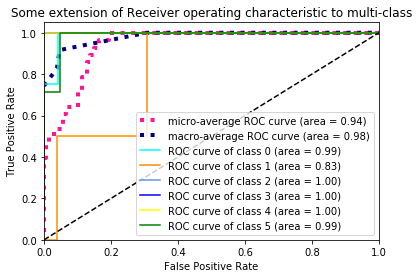

In [87]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue',"blue","yellow","green"])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, #lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# Repeat 1(f)i using a Naive Bayes’ classifier. Use both Gaussian and Multi- nomial priors and compare the results.

# Gaussian Naive Bayes

In [88]:
from sklearn.naive_bayes import GaussianNB

In [89]:
def multi_Gau_NB_grid_search_cv():
    res=0
    best_k_number=0
    current_list=[]
    
    #i is the number of Time Seires, J is the number of Lambda we choose
    for i in range(1,21):
        k_times_list=get_K_Times_Train_Datasets(i)
        matrix=get_DataMatrix(k_times_list)
        df=pd.DataFrame(matrix,columns=columns)
        df["Labels"]=[1]*(9*i)+[2]*(12*i)+[3]*(12*i)+[4]*(12*i)+[5]*(12*i)+[6]*(12*i)
        
        X_train=df.drop("Labels",axis=1)
        min_max_scaler = preprocessing.MinMaxScaler()
        X_train_normalized=min_max_scaler.fit_transform(X_train)
        Y_train=df["Labels"]
        
        cv_score=0
        current_best_k=0
        current_best_feature_number=0
        
        
        
        model=GaussianNB()
        scores = cross_val_score(model,X_train ,Y_train, cv=5)
        avg_scores=np.mean(scores)
        print("When Time Series = "+str(i)+" CV scores is:"+str(avg_scores))

        if avg_scores>res:
            res=avg_scores
            best_k_number=i
                
    current_list.append((res,best_k_number))
                
                
    return current_list

Gau_NB_res=multi_Gau_NB_grid_search_cv()

When Time Series = 1 CV scores is:1.0
When Time Series = 2 CV scores is:1.0
When Time Series = 3 CV scores is:1.0
When Time Series = 4 CV scores is:0.9923076923076923
When Time Series = 5 CV scores is:0.9739130434782609
When Time Series = 6 CV scores is:0.9753086419753085
When Time Series = 7 CV scores is:0.9773195876288661
When Time Series = 8 CV scores is:0.9706422018348624
When Time Series = 9 CV scores is:0.9719008264462812
When Time Series = 10 CV scores is:0.9710144927536233
When Time Series = 11 CV scores is:0.9652796420581655
When Time Series = 12 CV scores is:0.969699648820297
When Time Series = 13 CV scores is:0.9696754754880421
When Time Series = 14 CV scores is:0.9622402159244265
When Time Series = 15 CV scores is:0.9623188405797102
When Time Series = 16 CV scores is:0.9598408035452461
When Time Series = 17 CV scores is:0.9632521676413865
When Time Series = 18 CV scores is:0.9603336815985373
When Time Series = 19 CV scores is:0.9493005269420364
When Time Series = 20 CV scor

For the above result, we can find that The Gaussian Naive Bayes result are 100% percent Accuracy

# Multinomial Naive Bayes

In [90]:
from sklearn.naive_bayes import MultinomialNB

In [96]:
def multi_Mul_NB_grid_search_cv():
    res=0
    best_k_number=0
    best_lambda=0
    current_list=[]
    
    #i is the number of Time Seires, J is the number of Lambda we choose
    for i in range(1,21):
        k_times_list=get_K_Times_Train_Datasets(i)
        matrix=get_DataMatrix(k_times_list)
        df=pd.DataFrame(matrix,columns=columns)
        df["Labels"]=[1]*(9*i)+[2]*(12*i)+[3]*(12*i)+[4]*(12*i)+[5]*(12*i)+[6]*(12*i)
        
        X_train=df.drop("Labels",axis=1)
        min_max_scaler = preprocessing.MinMaxScaler()
        X_train_normalized=min_max_scaler.fit_transform(X_train)
        Y_train=df["Labels"]
        
        cv_score=0
        current_best_k=0
        current_best_feature_number=0
        
        
        for j in np.arange(1,10):
            model=MultinomialNB(alpha=j)
            scores = cross_val_score(model,X_train_normalized ,Y_train, cv=5)
            avg_scores=np.mean(scores)
            #print("When Time Series ="+str(i)+", Mutli NB Alpha ="+str(j)+" CV scores is"+str(avg_scores))
            
            if avg_scores>res:
                res=avg_scores
                best_k_number=i
                best_lambda=j
                
    current_list.append((res,best_k_number,best_lambda))
            
                
                
    return current_list

Mul_NB_res=multi_Mul_NB_grid_search_cv()

In [92]:
print(Mul_NB_res)

[(0.9639120372487856, 7, 2)]


From the above result,we can find that the Mul-NB has the 96.3% accuracy when Time Series=7, alpha=2

# iii. Which method is better for multi-class classification in this problem?

From this problem, we can find Gaussian Naive Bayes is best in this problem because it has 100% accuracy